In [2]:
# import libraries
import pandas as pd   #pandas
import numpy as np    #numpy
import seaborn as sns  #for data visualization
import matplotlib.pyplot as plt   #for data visualization


In [3]:
# load dataset
df = pd.read_csv("../data/customer_churn_raw.csv")

# display setting
pd.set_option("display.max_columns", None) # by default, pandas hide some extra columns, to see all columns, use it

# show first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#show the shape of dataset
print("Dataset size: ", df.shape)

Dataset size:  (7043, 21)


In [5]:
# show full overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# describe the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# show all columns
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [8]:
# check missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

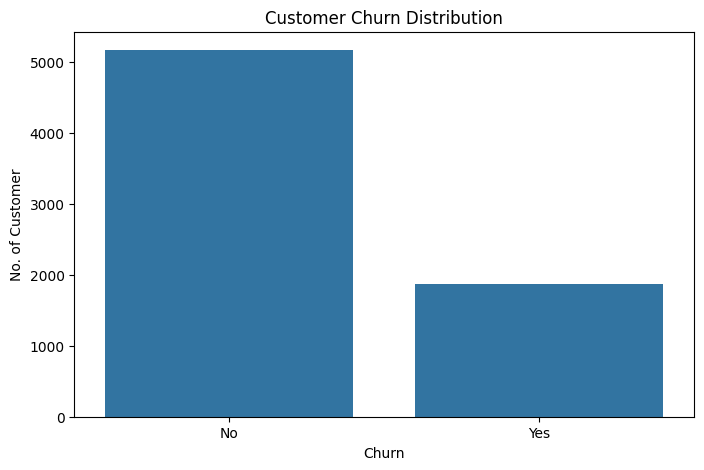

In [9]:
# show target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Churn', data=df)
plt.xlabel("Churn")
plt.ylabel("No. of Customer")
plt.title("Customer Churn Distribution")

# save the figure
plt.savefig("../reports/figures/churn_distribution.png")
plt.show()

In [10]:
# churn percentage
churn_percentage = df['Churn'].value_counts(normalize=True)*100
print("Churn rate (%):\n",churn_percentage)

Churn rate (%):
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


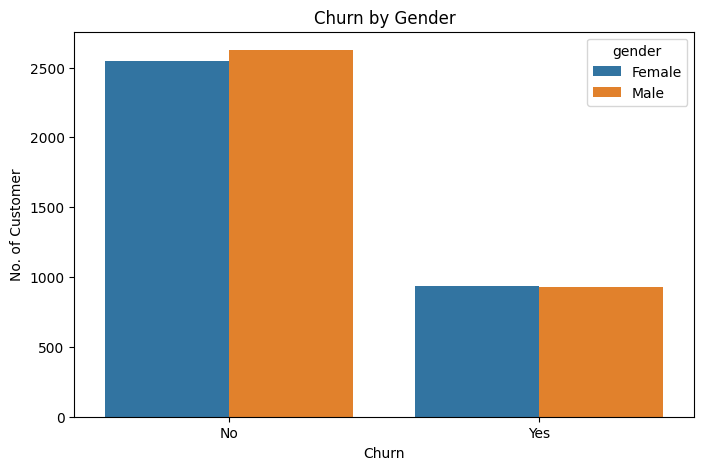

In [11]:
# check no. of churn by gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Churn', hue='gender')
plt.title("Churn by Gender")
plt.xlabel("Churn")
plt.ylabel("No. of Customer")

plt.show()

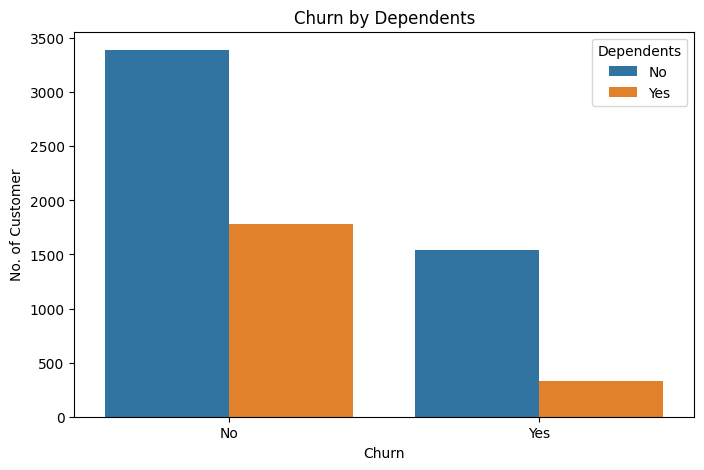

In [17]:
# check no. of churn by dependents
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Churn', hue='Dependents')
plt.title("Churn by Dependents")
plt.xlabel("Churn")
plt.ylabel("No. of Customer")

plt.show()

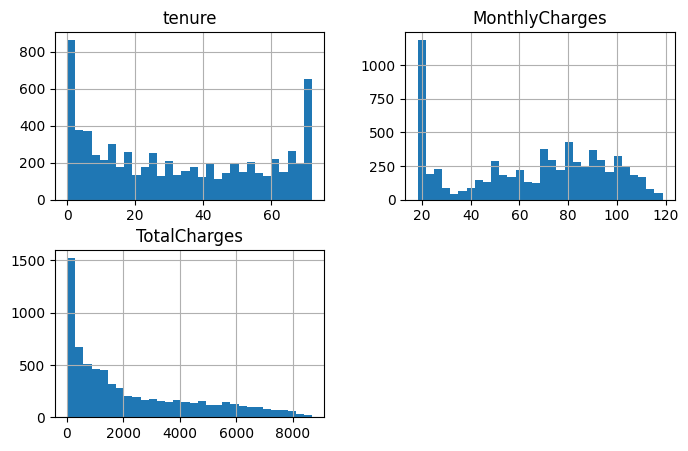

In [24]:
# numerical feature analysis
# list the numeric columns
num_cols = ['tenure', 'MonthlyCharges','TotalCharges']

#convert the total charges data type to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Histogram
df[num_cols].hist(bins=30, figsize=(8,5))

#save the figure
plt.savefig("../reports/figures/histogram_of_all_numerical_columns.png")
plt.show()

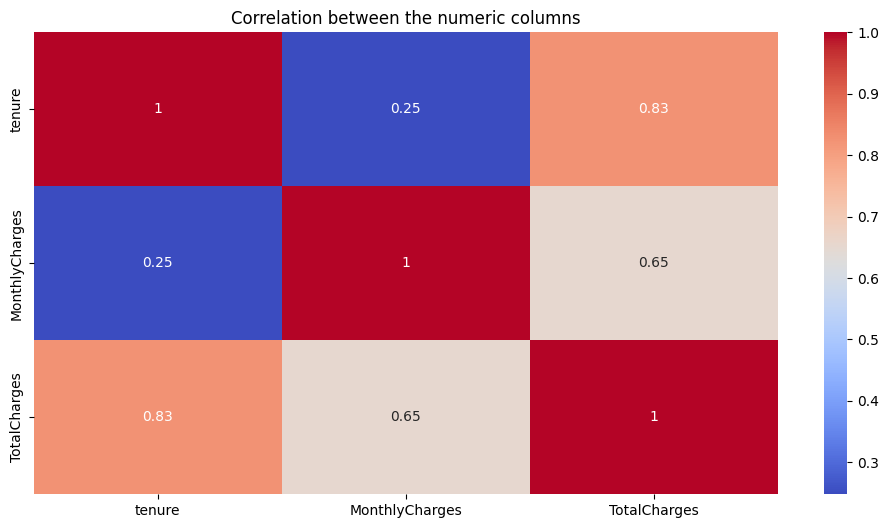

In [25]:
# correlation heatmap
#correlation
corr = df[num_cols].corr()

# heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between the numeric columns")

#save the figure
plt.savefig("../reports/figures/correlations.png")
plt.show()

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

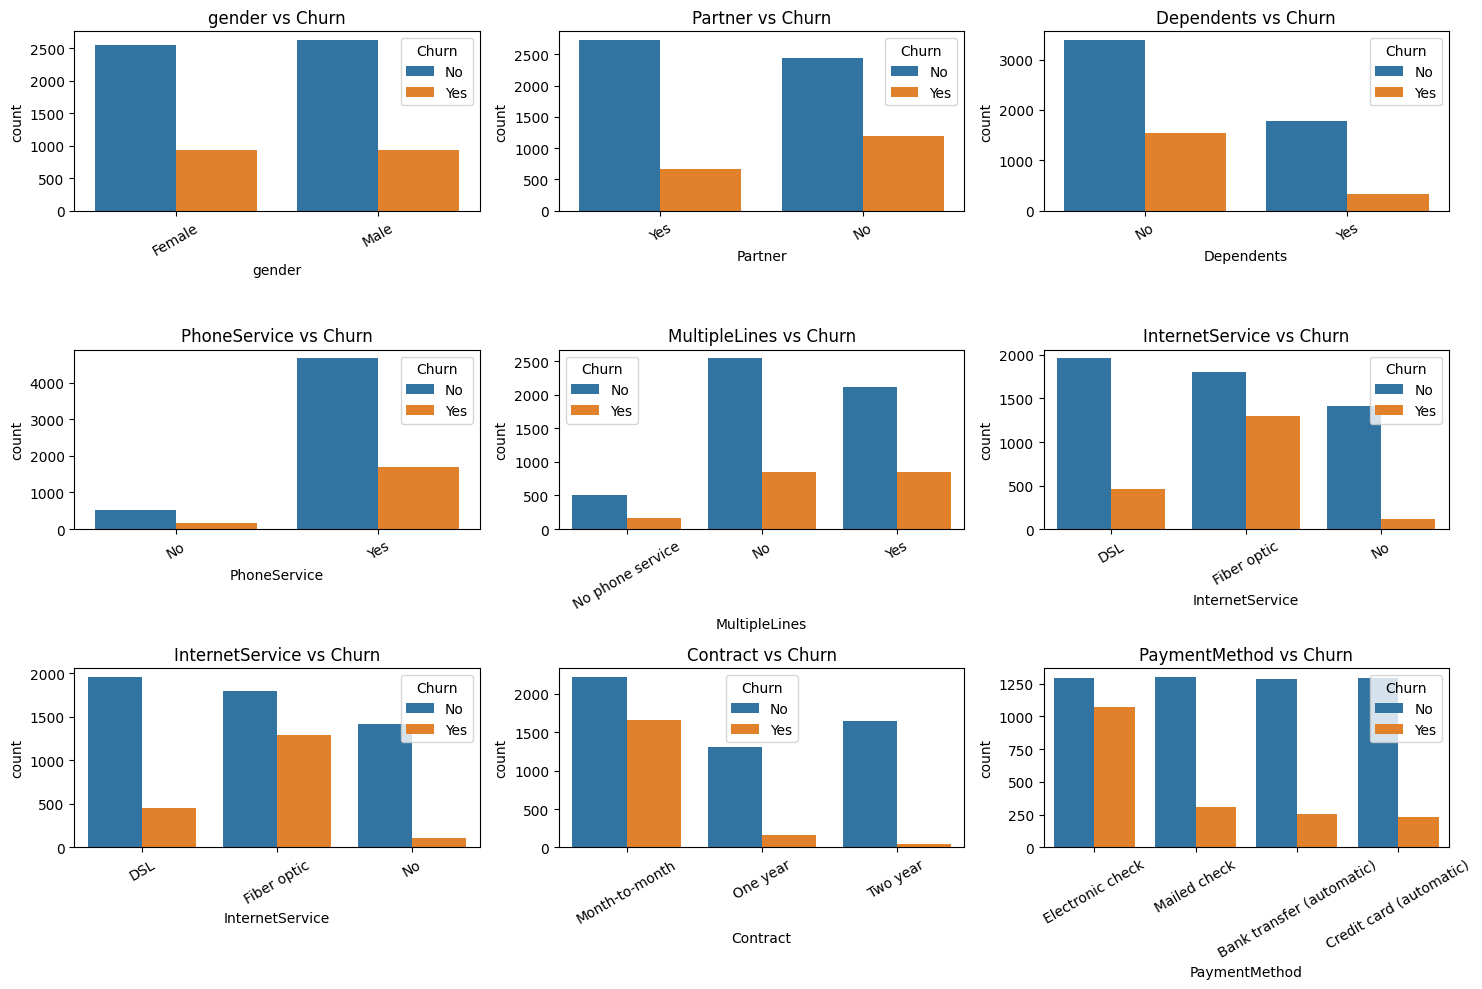

In [27]:
# categorical feature analysis
cat_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','InternetService','Contract','PaymentMethod']

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=30)

plt.tight_layout()
#save the figure
plt.savefig("../reports/figures/countplot_of_catgorical_features.png")
plt.show()